In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

***Команда DS 2N_Siberia:*** 
Казанцев Егор, 
Кочнев Александр, 
Черепанова Ирина, 
Боговеев Дмитрий

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии (**N декабря в M часов**).  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1IJRb8SGiHm2BnjQ-MJXXFrzzjCUf1FhCCG6QDHDPin0/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 


## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1jN8W_OQWm2Wryvn6rrSm58no679X_be_/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/esm4b205gf6ubfn/netflix_data.csv?dl=0

In [ ]:
data = pd.read_csv('netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
# изменение названий "двойных" столбцов для корректной работы кода

data = data.rename(columns = 
        {'release year' : 'release_year',
         'user rating score' : 'user_rating_score',
         'ratingLevel' : 'rating_level'})
#data.sort_values('release_year')
#pd.set_option('display.max_rows', 1000)
#data[data['user_rating_score'].isnull()].sort_values('rating')
#data.sort_values('user_rating_score')

#data.describe()
#data.info()

Удалите из данных дубликаты. 

In [ ]:
# удаляем повторы в столбце 'title' так как название шоу должно быть уникальным

data = data.drop_duplicates('title', keep='last')
#data

Сколько рейтинговых групп представлено в данных?

In [ ]:
# группировка по рейтингам и вывод количества групп

r = data.groupby('rating')
r.ngroups

13

In [ ]:
# сортировка рейтинговый групп по убыванию, топ-7

r = data.groupby(['rating']).size().sort_values(ascending=False).head(15)
r

rating
TV-14       105
TV-MA        81
PG           75
G            53
TV-Y         36
TV-PG        32
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
dtype: int64

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
# средние оценки пользователей по рейтинговым группам

r_1 = data.groupby(['rating'], as_index=False).agg({'user_rating_score' : 'mean'})
r_1.sort_values('user_rating_score', ascending=False)

,rating,user_rating_score
4,R,85.285714
7,TV-MA,84.825000
2,PG,83.978723
8,TV-PG,83.350000
5,TV-14,82.828947
1,NR,77.000000
10,TV-Y7,76.500000
9,TV-Y,75.000000
0,G,74.421053
6,TV-G,74.363636


In [ ]:
print('moda', data.user_rating_score.mode())

moda 0    96.0
1    97.0
2    98.0
dtype: float64


Text(0, 0.5, 'Количество пользователей')

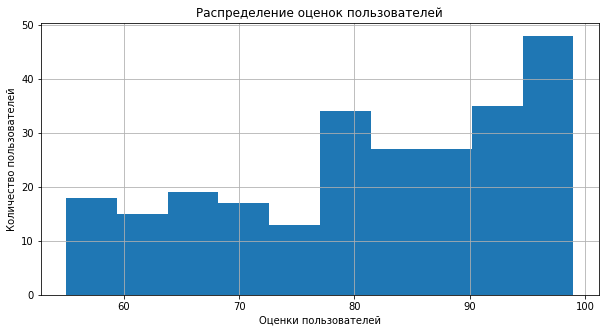

In [ ]:
plt.figure(figsize=(10,5))
data.user_rating_score.hist().set_title('Распределение оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество пользователей')

***Вывод:*** Netfix выпускает шоу в 13 рейтинговых группах. Больше всего шоу запущено в группах TV-14, TV-MA и PG. 
Шоу в этих группах как правило рекомендованы для взрослых и детей старше 14 лет. Некоторые шоу могут содержать моменты, не подобающие для детей, такие шоу рекомендуется смотреть с родителями. 



Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
print('среднее значение -', round(data.user_rating_score.mean(), 1))
print('стандартное отклонение -', round(data.user_rating_score.std(), 1))
print('минимум -', data.user_rating_score.min())
print('максимум -', data.user_rating_score.max())
print('медиана -', data.user_rating_score.median())

среднее значение - 81.3
стандартное отклонение - 12.8
минимум - 55.0
максимум - 99.0
медиана - 83.0


Text(0.5, 1.0, 'Оценки пользователей')

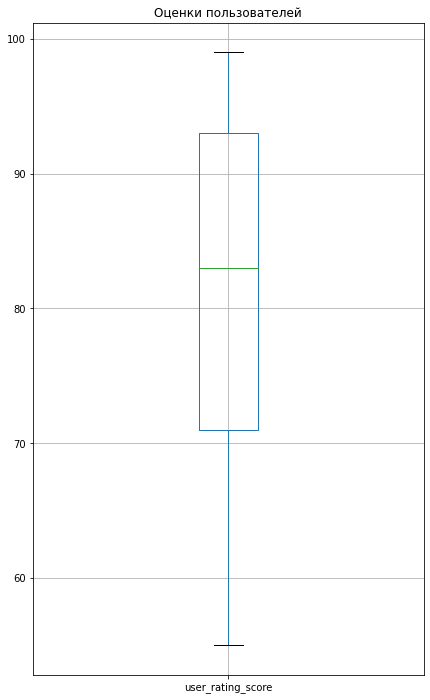

In [ ]:
plt.figure(figsize=(7,12))
data.boxplot('user_rating_score').set_title('Оценки пользователей')

***Ответ:*** Чаще всего пользователи оценивают шоу 
на  96, 97, 98 (мода оценок).
Средние оценки пользователей по самым массовым шоу Netflix (TV-14, TV-MA и PG) составляют от 74 до 84.
Наивысшие средние оценки имеют шоу групп:
* R - 85,2
* TV-MA - 84,8
* PG - 83,9
* TV-PG - 83,3
* TV-14 - 82,8

В среднем пользователи оценивают шоу Netflix 
на 81, стандартное отклонение в оценках пользователей составляет 12,8 пунктов. Минимальная оценка шоу - 55, максимальная – 99, серединный показатель, медиана - 83.
Медиана в меньшей степени подвержена искажению от выбросов, в отличии от среднего значения, представляющего собой среднее арифметическое всех оценок пользователей. 
Так как выбросы в оценках отсутствуют, медиана и среднее почти совпадают, различие в 2 пункта.


В какие годы были запущены шоу, представленные в датасете?

In [ ]:
data['release_year'].value_counts()

2016    145
2015     60
2017     37
2014     34
2013     32
2012     27
2011     15
2010     13
2008     11
2003     11
2005     10
2006     10
2009     10
1997      9
1998      9
2007      8
2000      7
2004      7
2001      6
1993      5
1999      5
2002      5
1994      4
1990      2
1995      2
1989      2
1982      2
1976      1
1987      1
1986      1
1978      1
1992      1
1940      1
1996      1
1991      1
Name: release_year, dtype: int64

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

Text(0, 0.5, 'Количество запущенных шоу')

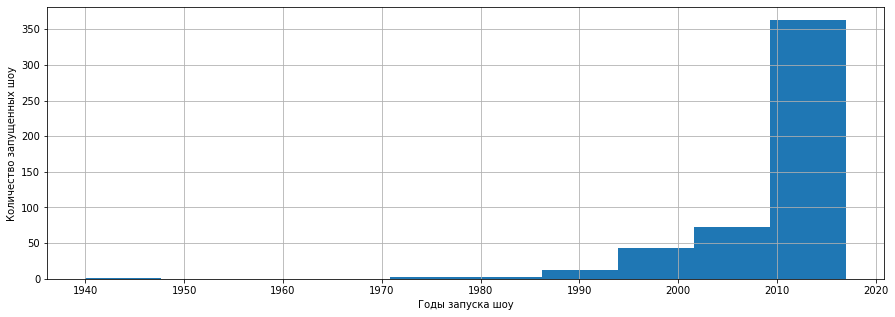

In [ ]:
plt.figure(figsize=(15,5))
data.release_year.hist()
plt.xlabel('Годы запуска шоу')
plt.ylabel('Количество запущенных шоу')

Теперь посмотрим на выброс.

Text(0.5, 1.0, 'Годы запуска шоу')

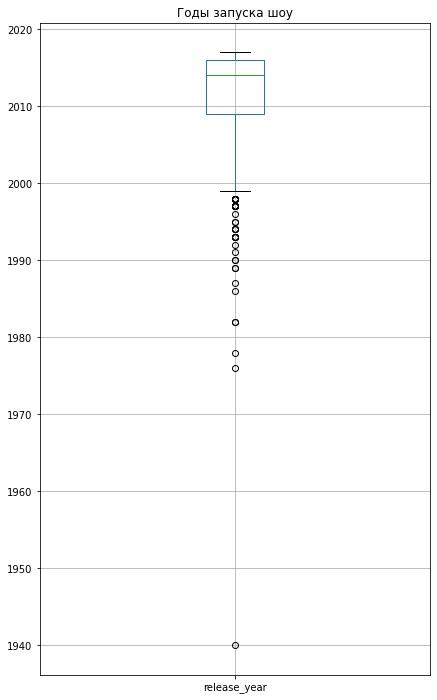

In [ ]:
#выброс лучше показать через график boxplot

plt.figure(figsize=(7,12))
data.boxplot('release_year').set_title('Годы запуска шоу')

#выбросом, результатом, выделяющимся из общей выборки будет шоу "Fantasia" рейтингом G	(General Audiences. Suitable for all ages) запущенное в 1940	и оцененое позльзователями рейтингом 61.0

***Вывод:*** Изучаемые шоу Netflix запущены с 1940 по 2017 годы, медианное значение количества запущенных шоу в год соответствует 2014 году (35 шоу), мода - 1 шоу.
Выбросом является 1940 год, в котором запущено шоу «Fantasia».
Также можно выделить года с 1976 по 1996 в которых Netflix запущено по 1 шоу.



Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
#посчитаем средние оценки пользователей по годам
data.groupby('release_year').mean()

,user_rating_score
release_year,
1940,61.000000
1976,NaN
1978,86.000000
1982,68.000000
1986,67.000000
1987,58.000000
1989,80.000000
1990,65.000000
1991,NaN


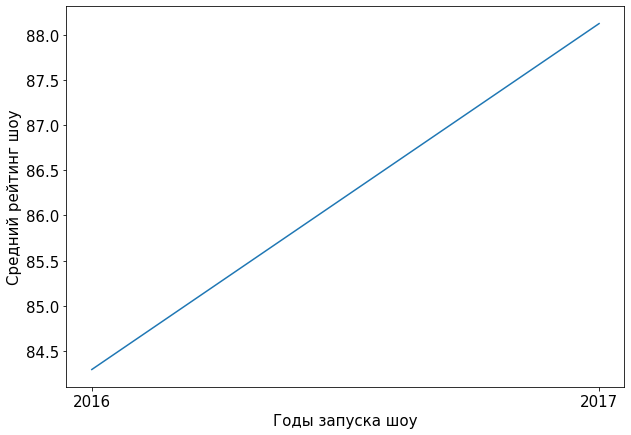

In [ ]:
#построим график сравнения средней оценки в 2016 и 2017 годах
gr=data.groupby('release_year').mean()
ar=gr[-2:]

import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


plt.figure(figsize=(10,7))
plt.xticks([2016, 2017],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Годы запуска шоу',fontsize=15)
plt.ylabel('Средний рейтинг шоу',fontsize=15)
plt.plot(ar)
plt.show()

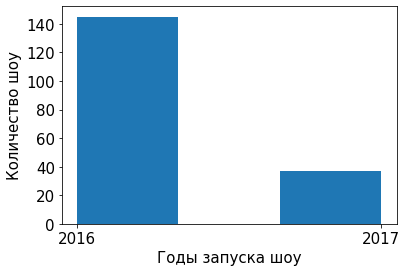

In [ ]:
#построим график сравнения количества запущенных шоу в 2016 и 2017 годах
plt.hist(data.release_year,3,(2016,2017))
plt.xticks([2016, 2017],fontsize=15, ha='center')
plt.yticks(fontsize=15)
plt.xlabel('Годы запуска шоу',fontsize=15, )
plt.ylabel('Количество шоу',fontsize=15)
plt.show()

**Вывод:** Можно сделать вывод, что 2017 г. успешнее для Netflix по среднему рейтингу оценок (88.13), чем 2016 г. (84.31). 
Однако нужно отметить, что по количеству выпущенных шоу  данные года значительно различаются: 2016- 145 шоу, 2017 - 36 шоу.

In [ ]:
#подгружаем дополнительные данные
%%capture
!wget https://www.dropbox.com/s/uku9msp7qqxyotq/netflix_reports_t.csv?dl=0

#from google.colab import files
#uploaded = files.upload()
#report = pd.read_excel('Netflix_reports_T.xlsx')
#report = report.set_index('release_year')
#report

In [ ]:
report = pd.DataFrame({'release_year':['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
                       'revenues_in_thousands_$':['150818', '270410', '500611', '682213', '996660', '1205340', '1364661', '1670269', '2162625', '3204577', '3609282', '4374562', '5504656', '6779511', '8830669', '11692713', '15794341'],
                       'Net_income_in_thousands_$':['-20948', '6512', '21383', '41889', '48839', '66608', '83026', '115860', '160853', '226126', '17152', '112403', '266799', '122641', '186678', '558929', '1211242']})


In [ ]:
report = report.set_index('release_year')
report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2002 to 2018
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   revenues_in_thousands_$    17 non-null     object
 1   Net_income_in_thousands_$  17 non-null     object
dtypes: object(2)
memory usage: 408.0+ bytes


In [ ]:
report['revenues_in_thousands_$'] = report['revenues_in_thousands_$'].astype('float64') 
report['Net_income_in_thousands_$'] = report['Net_income_in_thousands_$'].astype('float64') 

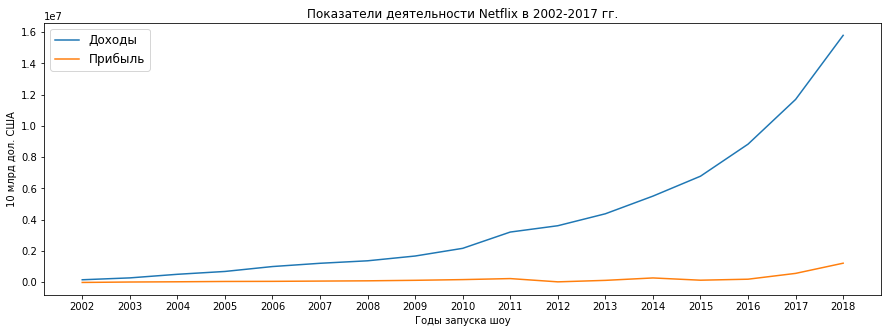

In [ ]:
#строим график динамики прибыли и доходов компании по годам
plt.figure(figsize=(15,5))
plt.plot(report)
plt.xlabel('Годы запуска шоу')
plt.ylabel('10 млрд дол. США')
plt.title('Показатели деятельности Netflix в 2002-2017 гг.')
plt.legend(('Доходы', 'Прибыль'), prop={'size': 12})

**Вывод:** Но все-таки 2017 год для Netflix стал значительно успешнее предыдущих лет, это показал анализ дополнительной информации, финансово - экономических показателей компании. В 2017 году доход достиг 11.6 млрд долл США (131,8% к 2016 году), а прибыль - 0.56 млрд долл США (294,7% к 2016 году).

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

In [ ]:
data_rat=data.groupby(['rating'], as_index=False).size().sort_values('size', ascending=False, ignore_index=True)
data_rat = data_rat.rename(columns = 
        {'size' : 'Qty_shows'})
data_rat

,rating,Qty_shows
0,TV-14,105
1,TV-MA,81
2,PG,75
3,G,53
4,TV-Y,36
5,TV-PG,32
6,TV-G,29
7,TV-Y7-FV,25
8,TV-Y7,23
9,R,14


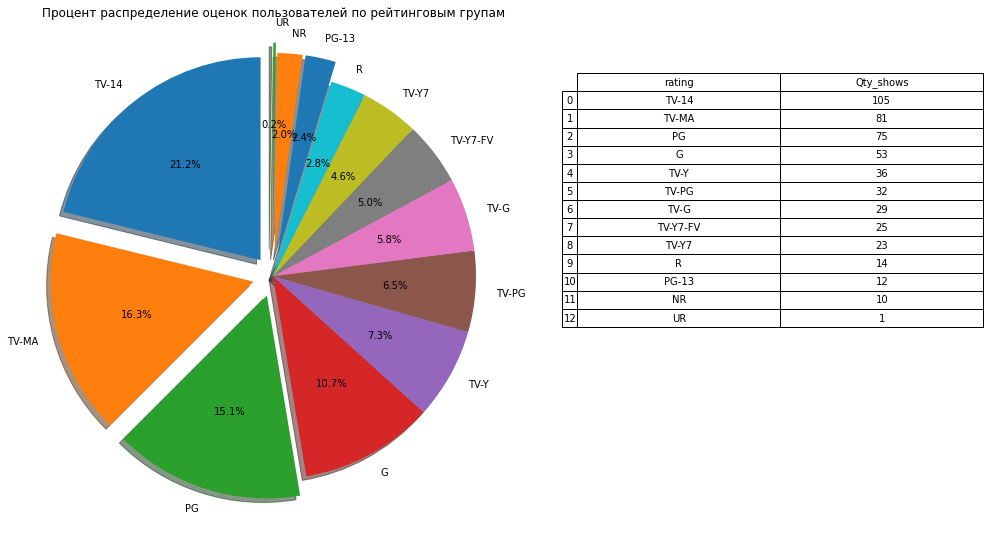

In [ ]:
plt.figure(figsize=(20,37))
ax1 = plt.subplot(121, aspect='equal')
data_rat.plot(kind='pie', y = 'Qty_shows', explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0.1,0.1,0.15), ax=ax1, autopct='%1.1f%%',
 startangle=90, shadow=True, labels=data_rat['rating'], legend =False, fontsize=10)
plt.title('Процент распределение оценок пользователей по рейтинговым групам')
plt.ylabel('')

plt.table(cellText=data_rat.values,colWidths = [0.15]*len(data_rat.columns),
rowLabels=data_rat.index,
colLabels=data_rat.columns,
cellLoc = 'center', rowLoc = 'center',
loc='bottom', bbox=[1.1, 0.4, 0.8, 0.5])


***Вывод:*** Больше всего шоу запущено в группах TV-14,TV-MA,PG - 21,2%, 16,3%, 15,1% соответственно от общего количества шоу, наименьшее - в рейтинговой группе UR, NR, PG-13 -  0,2%,2,0%,2,4% соответственно от общего количества шоу. Наибольшей популярностью пользуются шоу, предназначенные для семейного просмотра, наименьшей популярностью - строго взрослый контент. 
Визуально более интерпретируемым графиком в данном случае является круговая диаграмма.


Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
s=data.groupby('rating')
s_1=s.get_group('TV-14')
s_1=s_1.set_index('title')
s_1.head(10)
	
 

,rating,rating_level,release_year,user_rating_score
title,,,,
Death Note,TV-14,Parents strongly cautioned. May be unsuitable ...,2006,77.0
The Seven Deadly Sins,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
Fearless,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
Happily Married,TV-14,NaN,2015,NaN
Inside Russia's Toughest Prison,TV-14,Parents strongly cautioned. May be unsuitable ...,2011,NaN
Stranger Things,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,90.0
Mad Men,TV-14,Parents strongly cautioned. May be unsuitable ...,2014,75.0
The Cleveland Show,TV-14,Parents strongly cautioned. May be unsuitable ...,2012,88.0
Absolutely Fabulous,TV-14,Parents strongly cautioned. May be unsuitable ...,2012,59.0


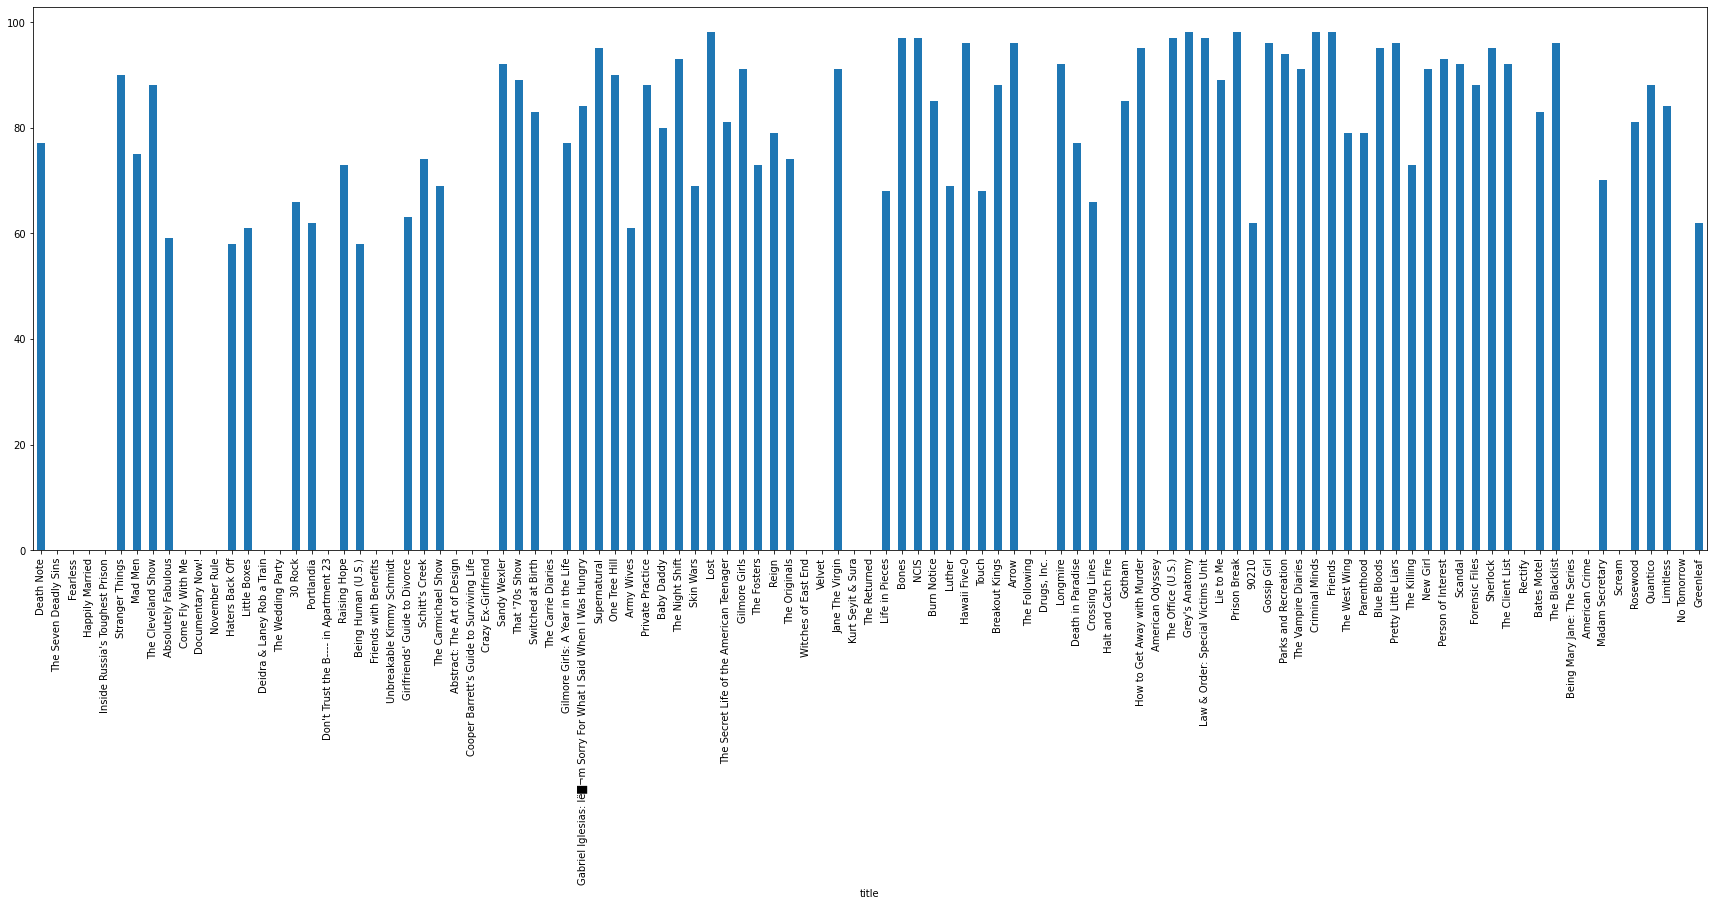

In [ ]:
plt.figure(figsize=(30,10))
s_1['user_rating_score'].plot.bar(fontsize=10)

Grey's Anatomy

Шоу Grey's Anatomy запущено Netflix в 2016 году, в группе TV-14, подходит для просмотра детей в возрасте до 14 лет, с родителями. Рейтинг TV-14 является лидирующим среди остальных групп, здесь оставлено максимальное количество оценок пользователей. Шоу оценено пользователями на 98, что на 20% выше средней оценки (81) и почти соответствует максимальной (99). Grey's Anatomy в своей группе, среди других шоу этого же года является один из лидеров по оценке пользователей.





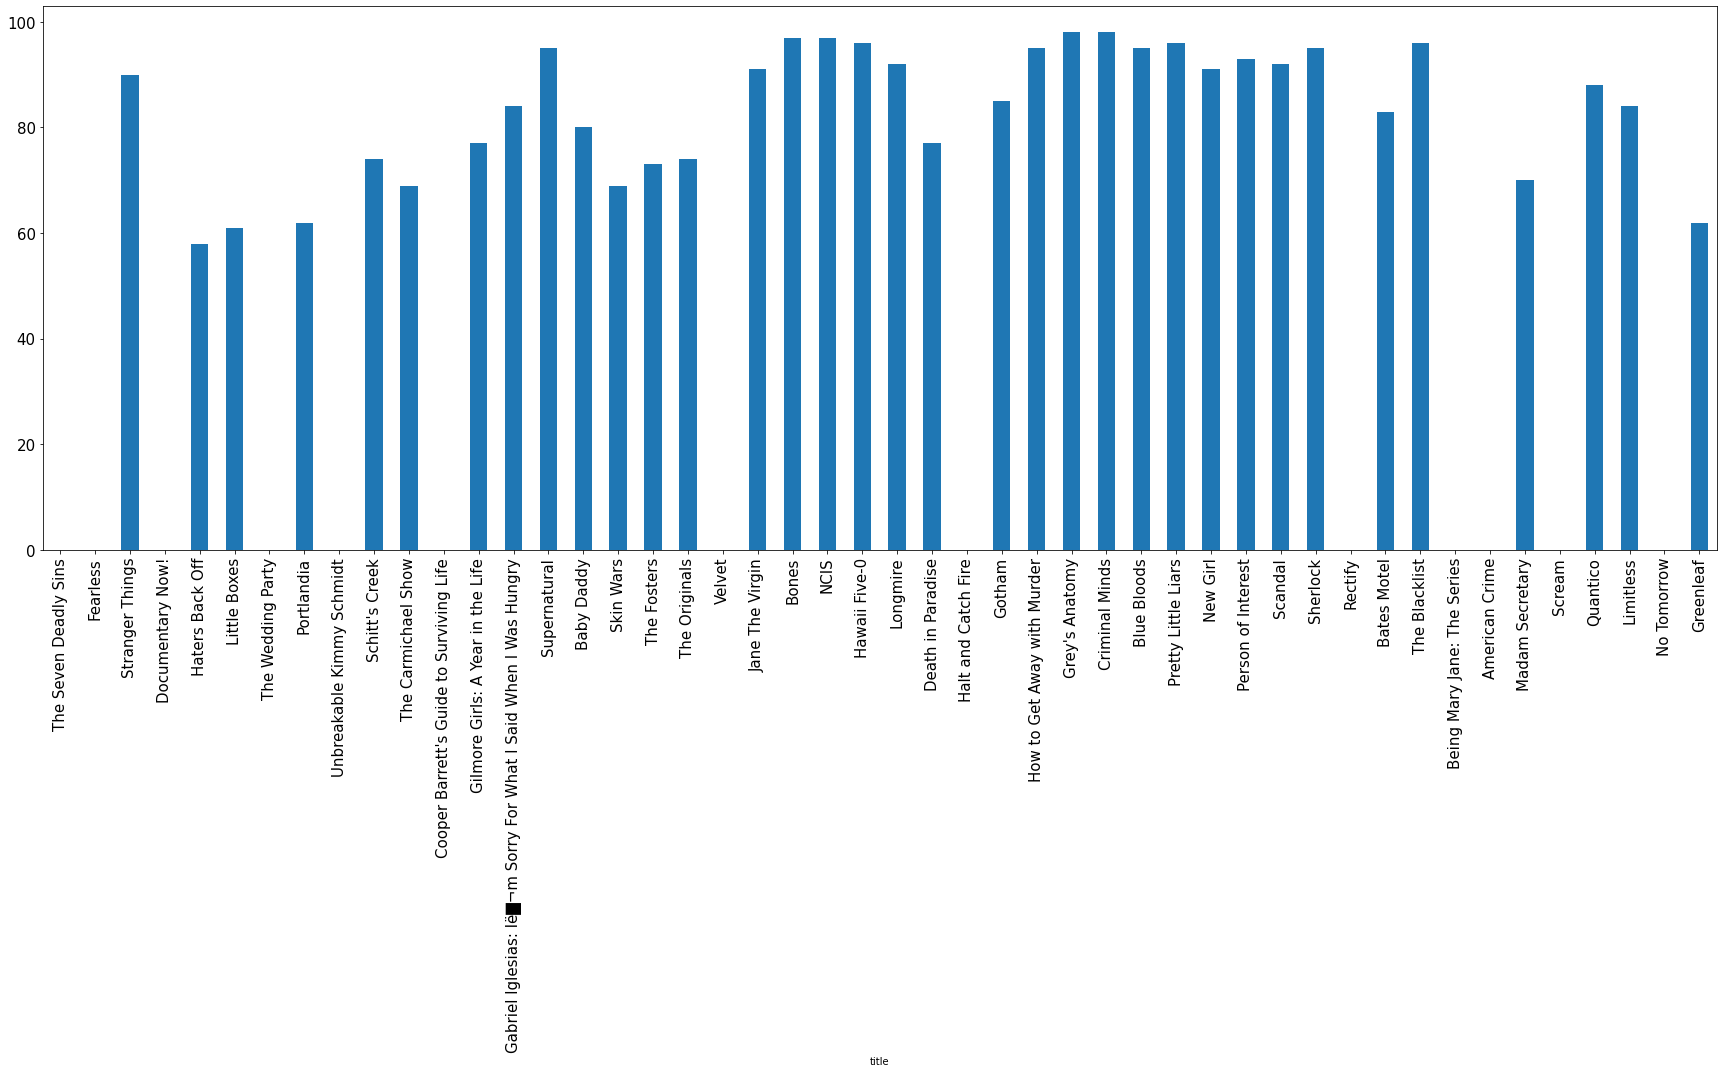

In [ ]:
#Построим график по выбранному рейтингу среди шоу 2016 года в этой группе
dfTV14=data[data['rating']=='TV-14']
dfTV14y2016=dfTV14[dfTV14['release_year']==2016]
dfPict=dfTV14y2016.set_index('title')

plt.figure(figsize=(30,10))
dfPict['user_rating_score'].plot.bar(fontsize=15)